Our goal will be to use the normal equation coded by hand versus the Linear Regression class in sklearn to predict water temperature (T_degC).

Complete the following questions in a Jupyter Notebook & submit as an HTML or pdf (example of how to do this provided in Canvas).

 

# Part A: Data Cleaning & Exploratory Analysis

1. Import full data set using Pandas:
Verify that the shape is: (864863, 74)


In [1]:
import pandas as pd
data= pd.read_csv('bottle.csv')
data.head()

/var/folders/2r/lkmkhwss2rjbxkptb7z7g63r0000gn/T/ipykernel_86743/3744233298.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.shape

(864863, 74)

2. Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values (Hint: Pandas has a method for this) .
Verify the shape is: (812174, 3)



In [3]:
data= data[['T_degC', 'Salnty', 'STheta']]
data.dropna(inplace=True)
data.shape

(812174, 3)

3. Build the following plots using matplotlib:
a) Scatter: Salnty (salinity of water) vs T_degC
b) Scatter: STheta (density of water) vs T_degC



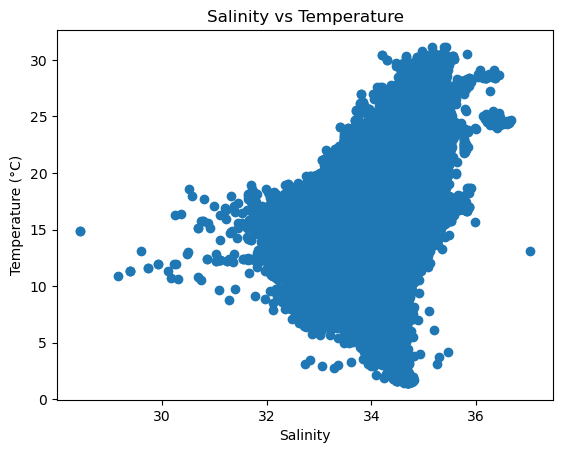

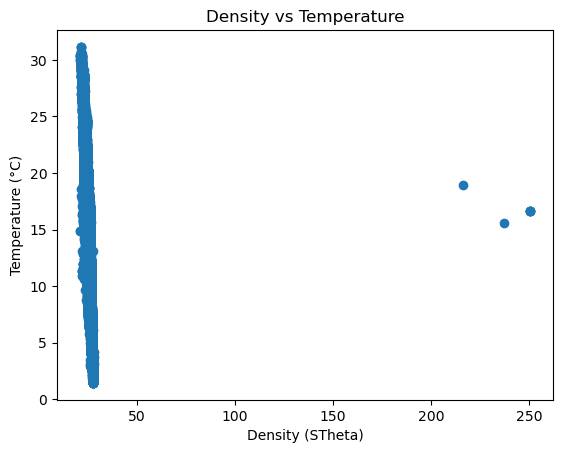

In [4]:
import matplotlib.pyplot as plt
# a)Scatter: Salnty (salinity of water) vs T_degC 
plt.scatter(data['Salnty'], data['T_degC'])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.title('Salinity vs Temperature')
plt.show()
# b)Scatter: STheta (density of water) vs T_degC
plt.scatter(data['STheta'], data['T_degC'])
plt.xlabel('Density (STheta)')
plt.ylabel('Temperature (°C)')
plt.title('Density vs Temperature')
plt.show()

4. Build the following plot using seaborn: 
a) Distribution of T_degC (hint: distplot will be helpful here)



/var/folders/2r/lkmkhwss2rjbxkptb7z7g63r0000gn/T/ipykernel_86743/2305682470.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['T_degC'])


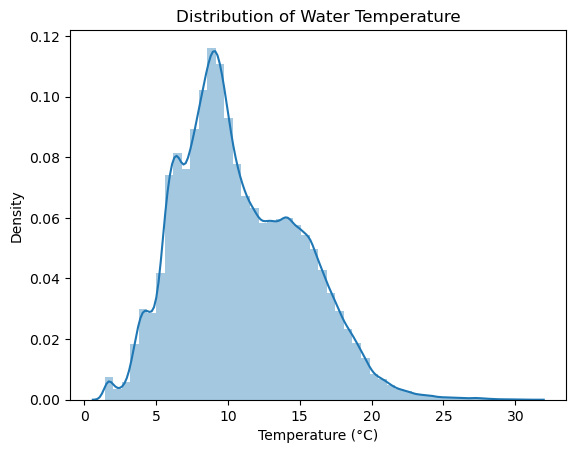

In [5]:
import seaborn as sns

sns.distplot(data['T_degC'])
plt.xlabel('Temperature (°C)')
plt.title('Distribution of Water Temperature')
plt.show()


5. Remove obvious outliers from step 3b:
 Shape for clean data will be: (812168, 3)
Hint: Just looking to remove extreme STheta values - please post on Canvas if struggling with this section. 



<Axes: >

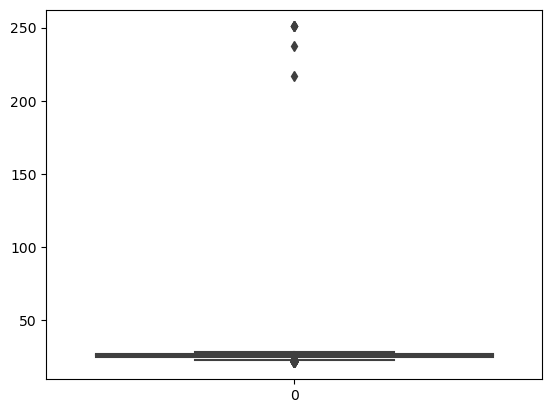

In [6]:
import seaborn as sns
sns.boxplot(data['STheta'])

In [7]:
data['STheta'].describe()

count    812174.000000
mean         25.819394
std           1.167787
min          20.934000
25%          24.965000
50%          25.996000
75%          26.646000
max         250.784000
Name: STheta, dtype: float64

In [8]:
# Removing the outliers
clean_data=data[(data['STheta'] <= 100)]
clean_data.shape

(812168, 3)

In [9]:
clean_data['STheta'].describe()

count    812168.000000
mean         25.817791
std           1.007309
min          20.934000
25%          24.965000
50%          25.996000
75%          26.646000
max          28.139000
Name: STheta, dtype: float64

6. Plot 3b again – does it look better? Explain!

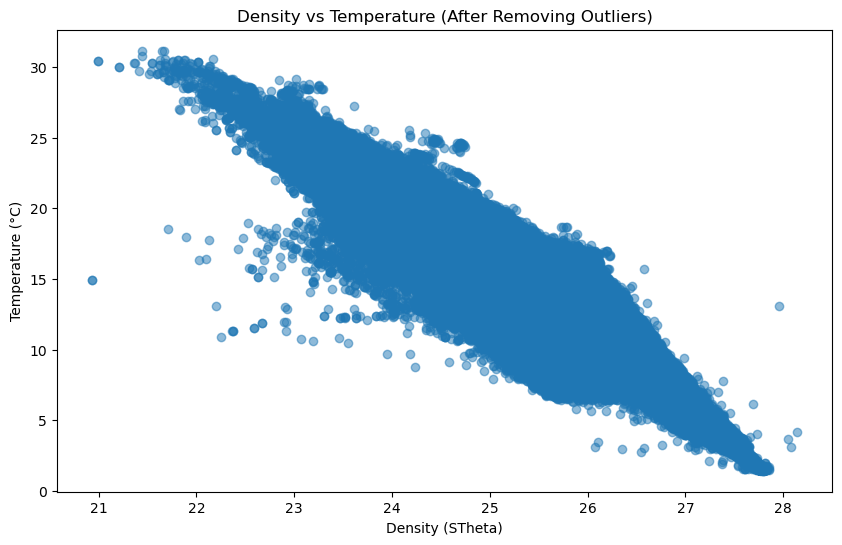

In [10]:
# Plotting the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['STheta'], clean_data['T_degC'], alpha=0.5)
plt.xlabel('Density (STheta)')
plt.ylabel('Temperature (°C)')
plt.title('Density vs Temperature (After Removing Outliers)')
plt.show()


After removing the outlier, we can see that the trend is evident and the graph looks more reasonable!

# Part B: Train & Test Split:
As we know, we must generate a training set for model building and a testing set for model validation. Feel free to perform these steps however you want, but please note that sklearn has a `train_test_split` class that is perfect for this type of work: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html Links to an external site.

 

Our X matrix (features / independent variables) will be: [Salnty, STheta]

Our y matrix (target / dependent variable) will be: T_degC

Build out the following: 
- X_train
- X_test
- y_train
- y_test

Make sure to add a seed (called random_state in train_test_split) so your split is reproducible.

In [11]:
from sklearn.model_selection import train_test_split

X=clean_data[['Salnty', 'STheta']]
y=clean_data['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Part C: Linear Regression Using Normal Equation - Coded In Python

We will start by building our linear regression model using numpy. If you need help for this, please refer to https://github.com/ageron/handson-ml Links to an external site. where a similar example can be found under Chapter 4. 

We will use the closed-form solution called the Normal Equation to solve the following:

1. Build the normal equation using numpy & fit using your training data (X_train & y_train).
Note: Make sure to include an intercept value of 1 for every observation in your X_train.


In [12]:
import numpy as np
X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_train.shape[0]

649734

2. Print out the coefficients - we will need to compare these to the output in Part 4


In [13]:
theta = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)
theta

array([35.64451188,  3.11151204, -5.03907257])

3. Predict T_degC for the test data using the fitted values in b.
Make sure to include an intercept value of 1 for every observation in your X_test.
Call predictions y_pred


In [14]:
X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]

y_pred = X_test_with_intercept.dot(theta)
y_pred

array([ 7.88437556,  7.14969722,  5.22668207, ...,  7.14752462,
       16.11974133, 15.64019849])

4. Calculate the following for the test data:
mean squared error
r-squared
 explained variance
Note: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics Links to an external site.
Links to an external site.Create a scatterplot that shows actual versus predicted values for the T_degC.
 

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# Print the coefficients and the evaluation metrics
print("Coefficients: ", theta)
print("Mean Squared Error: ", mse)
print("R-squared: ", r_squared)
print("Explained Variance: ", explained_var)

Coefficients:  [35.64451188  3.11151204 -5.03907257]
Mean Squared Error:  0.23378301431781784
R-squared:  0.986891956563444
Explained Variance:  0.986891961456094


5. Create a scatterplot that shows actual versus predicted values for the T_degC.

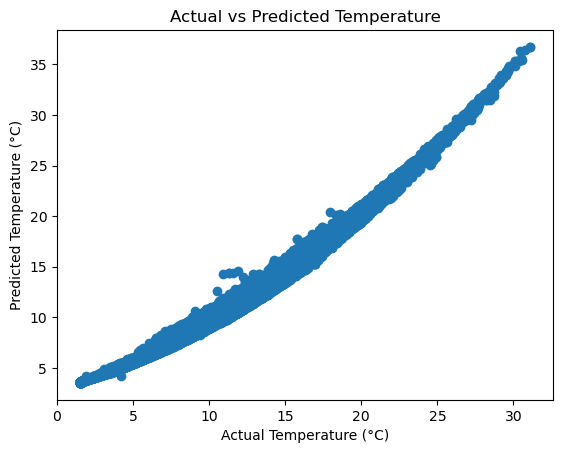

In [16]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.show()


# Part D: Using sklearn API

sklearn is a fantastic tool within python full of various model classes. For this portion of the assignment, use the class LinearRegression to replicate work done in Part C. Specifically, you should create an instance of the following class:

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares Links to an external site.

1. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.

Note: sklearn will automatically add the intercept term, so you do not need to do this here. 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Fit lin_reg using X_train and y_train
# Note: No need to add an intercept term, as sklearn does this automatically
lin_reg.fit(X_train, y_train)

LinearRegression()

 
2. Print out the coefficients (including the intercept)

Note: These should be EXACTLY the same as what you found in Part C step 2


In [18]:
lin_reg.intercept_,lin_reg.coef_

(35.64451187804845, array([ 3.11151204, -5.03907257]))

In [19]:
coefficients = np.append(lin_reg.intercept_, lin_reg.coef_)
print("Coefficients (including intercept):", coefficients)

Coefficients (including intercept): [35.64451188  3.11151204 -5.03907257]


3. Predict T_degC for the test data using the fitted values in b.

Call predictions y_pred_sklearn


In [20]:
y_pred_sklearn=lin_reg.predict(X_test)


4. Calculate the following for the test data:
mean squared error
r-squared
 explained variance


In [21]:
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r_squared_sklearn = r2_score(y_test, y_pred_sklearn)
explained_variance_sklearn = explained_variance_score(y_test, y_pred_sklearn)

# Print the evaluation metrics
print("Mean Squared Error:", mse_sklearn)
print("R-squared:", r_squared_sklearn)
print("Explained Variance:", explained_variance_sklearn)


Mean Squared Error: 0.23378301431811885
R-squared: 0.9868919565634271
Explained Variance: 0.9868919614560767


5. Create a scatterplot that shows actual versus predicted values for the T_degC.

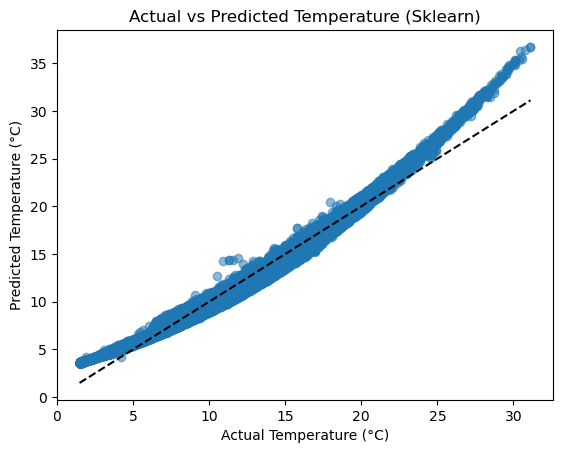

In [23]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sklearn are already defined in your environment

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature (Sklearn)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line for reference
plt.show()


# Part E: Conceptual Questions

## 1. Why is it important to  have a test set?

First for **model evaluation**, splitting test, train data is important. It provides a robust way to evaluate the performance of a model on unseen data. 

Second to **prevent overfitting issue**, without a test set, there's a risk of overfitting the training data. Overfitting happens when a model learns not only the underlying patterns in the training data but also its noise. As a result, it performs well on the training data but poorly on any new data.

## 2. If the normal equation always provides a solution, when would we not want to use it?

Linear Regression with OLS is useful when equation is linear with size of training set so it can handle large training sets efficiently 

However, it is **computational complexity** of inverting a matrix that increases with size of training set and 

it is **difficult to do online learning with new data** arriving regularly (need to recalculate estimates), i.e. no iterative parameter updates

## 3. How might we improve the fit of our models from Part C & D?
Note: There are lots of possible answers to this section - just describe one in detail. 

One way to improve the fit of linear models is through feature engineering.

First we can try **Feature Selection**: Remove irrelevant or redundant features. This can reduce noise and improve model performance, especially in cases where some features do not contribute much to the prediction.

Second, adding **Interaction Terms**: Sometimes, the relationship between features 
and the target variable is better captured by including interaction terms (products of features).


## 4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 

**High Bias- Underfit.** Does not fit the training data and traning data well

**High Variance- Overfit.** “learns” the training data too well but not for traning data

**Bias-variance tradeoff** - finding the sweet spot where where, tuning bias, not move var/tuning var, not move bias, by increasing (decreasing) a model’s capacity / complexity / degrees-of-freedom reduces (increases) bias + increases (decreases) variance

## 5. In a linear regression model, how might we reduce bias?

WE can **add more parameters** and/or features or Reduce model constraints.


## 6. In a linear regression model, how might we reduce variance? 

We can remove features and/or parameters, get more training data or improve training data quality by reducing noise.